In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing= housing.drop_duplicates()
print(housing.shape)
housing.head()

(2579, 81)


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2117 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2579 non-null   object 
 10  LandContour    2579 non-null   object 
 11  Utilities      2579 non-null   object 
 12  LotConfig      2579 non-null   object 
 13  LandSlope      2579 non-null   object 
 14  Neighborhood   2579 non-null   object 
 15  Condition1     2579 non-null   object 
 16  Condition2     2579 non-null   object 
 17  BldgType       2579 non-null   object 
 18  HouseStyl

In [4]:
housing[['MSSubClass']] = housing[['MSSubClass']].astype(str)

#Handling Nulls

In [5]:
nulls = housing.isnull().sum()
null_count= nulls[nulls > 0].sort_values(ascending= False)
null_count
#PoolQC, MiscFeature, Alley, Fence, FireplaceQu might need to be dropped.

PoolQC          2570
MiscFeature     2482
Alley           2411
Fence           2054
FireplaceQu     1241
LotFrontage      462
GarageYrBlt      129
GarageCond       129
GarageQual       129
GarageFinish     129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtCond          69
BsmtQual          69
BsmtFinType1      69
MasVnrType        14
MasVnrArea        14
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
Electrical         1
dtype: int64

In [6]:
housing[['PoolQC', 'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish','GarageCond', 
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = housing[['PoolQC', 
         'FireplaceQu', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageCond',
         'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].replace(np.nan,'NA')

housing[['MasVnrType']] = housing[['MasVnrType']].replace(np.nan,'None')

housing[['MasVnrArea','TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 
         'BsmtFullBath']] = housing[['MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1','GarageArea', 
         'GarageCars', 'BsmtHalfBath','BsmtFullBath']].replace(np.nan, 0) 

housing[['Electrical']] = housing[['Electrical']].replace(np.nan, 'SBrkr')

In [7]:
nulls2 = housing.isnull().sum()
null_count2= nulls2[nulls2 > 0].sort_values(ascending= False)
a= null_count2.to_frame().transpose().columns

In [8]:
housing[a].describe()

,LotFrontage,GarageYrBlt
count,2117.000000,2450.000000
mean,68.510628,1976.997143
std,22.839861,24.653507
min,21.000000,1895.000000
25%,57.000000,1960.000000
50%,68.000000,1978.000000
75%,80.000000,2000.000000
max,313.000000,2010.000000


<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

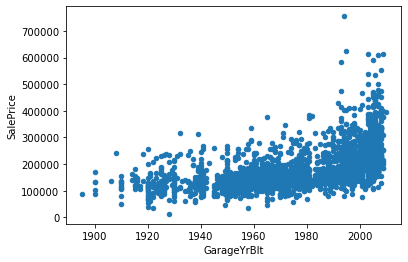

In [9]:
housing[['GarageYrBlt', 'SalePrice']].plot(kind='scatter', x='GarageYrBlt', y='SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

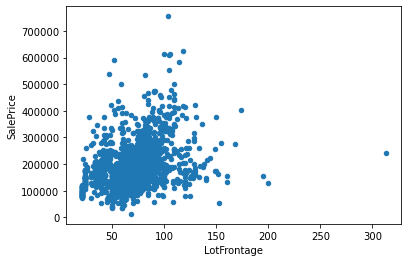

In [10]:
housing[['LotFrontage', 'SalePrice']].plot(kind='scatter', x='LotFrontage', y='SalePrice')

In [11]:
import random
random.seed(1)
for i in range(1,130):
    n = random.randint(1895,2010)
    housing[['GarageYrBlt']]= housing[['GarageYrBlt']].replace(np.nan, n)

In [12]:
random.seed(1)
for i in range(1,463):
    n = random.randint(21,200)
    housing[['LotFrontage']]= housing[['LotFrontage']].replace(np.nan, n)

In [13]:
housing.shape

(2579, 81)

<AxesSubplot:>

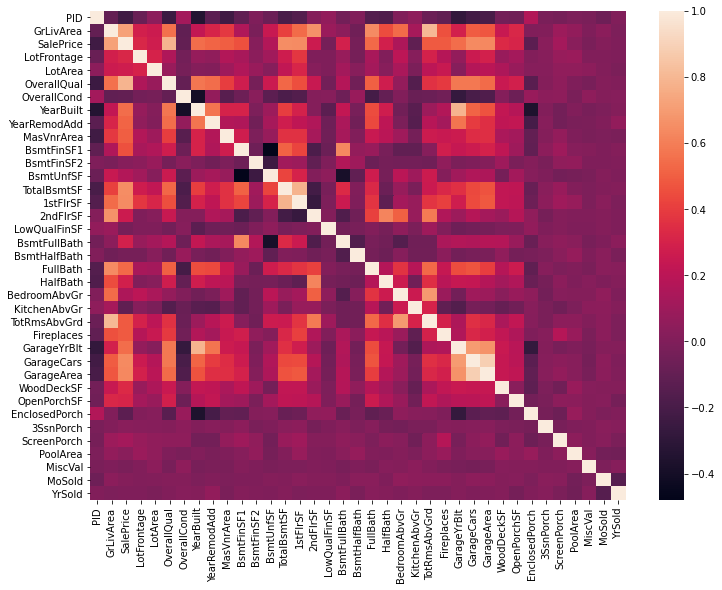

In [14]:
plt.figure(figsize=(12, 9))
sns.heatmap(housing.corr())

In [15]:
housing.corr().unstack().sort_values(ascending= False).drop_duplicates().head(20)

YrSold        YrSold          1.000000
GarageCars    GarageArea      0.889910
GrLivArea     TotRmsAbvGrd    0.807432
SalePrice     OverallQual     0.790661
GarageYrBlt   YearBuilt       0.787733
1stFlrSF      TotalBsmtSF     0.784280
GrLivArea     SalePrice       0.719980
GarageYrBlt   GarageCars      0.695076
TotRmsAbvGrd  BedroomAbvGr    0.693548
GarageYrBlt   GarageArea      0.669866
2ndFlrSF      GrLivArea       0.664967
TotalBsmtSF   SalePrice       0.652540
FullBath      GrLivArea       0.644277
1stFlrSF      SalePrice       0.642623
SalePrice     GarageCars      0.638640
GarageArea    SalePrice       0.634706
BsmtFullBath  BsmtFinSF1      0.633063
2ndFlrSF      HalfBath        0.622261
TotRmsAbvGrd  2ndFlrSF        0.588033
GarageCars    OverallQual     0.580910
dtype: float64

In [16]:
housing.corr().unstack()['SalePrice'].sort_values(ascending= False).head(50)

SalePrice        1.000000
OverallQual      0.790661
GrLivArea        0.719980
TotalBsmtSF      0.652540
1stFlrSF         0.642623
GarageCars       0.638640
GarageArea       0.634706
GarageYrBlt      0.546481
YearBuilt        0.544569
FullBath         0.535175
YearRemodAdd     0.514720
MasVnrArea       0.498513
TotRmsAbvGrd     0.490206
Fireplaces       0.488173
BsmtFinSF1       0.461056
WoodDeckSF       0.333332
LotFrontage      0.318277
OpenPorchSF      0.306629
BsmtFullBath     0.290867
HalfBath         0.285861
LotArea          0.274427
2ndFlrSF         0.263115
BsmtUnfSF        0.168118
BedroomAbvGr     0.151924
ScreenPorch      0.121392
3SsnPorch        0.031269
PoolArea         0.030849
BsmtFinSF2       0.022694
MoSold           0.012725
YrSold          -0.001261
MiscVal         -0.018869
LowQualFinSF    -0.030827
BsmtHalfBath    -0.033766
OverallCond     -0.101123
KitchenAbvGr    -0.113962
EnclosedPorch   -0.123209
PID             -0.226410
dtype: float64

In [17]:
h2= housing[['GrLivArea', 'LotFrontage', 'LotArea','MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','GarageYrBlt', 'YearBuilt', 'YearRemodAdd']]

h3= housing[['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSSubClass', 'MoSold', 'YrSold']]

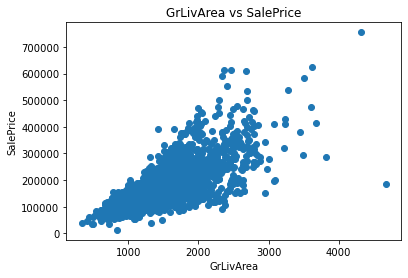

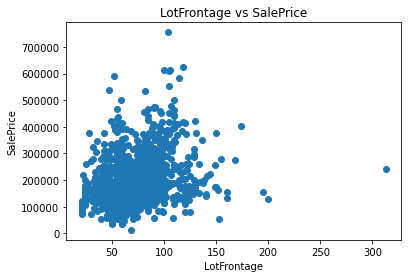

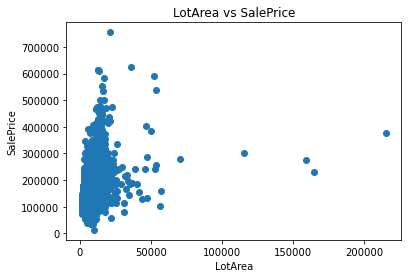

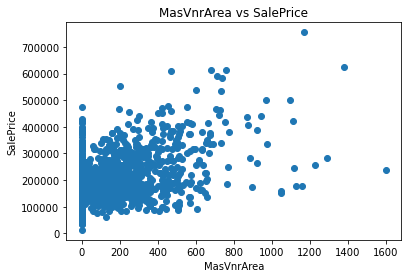

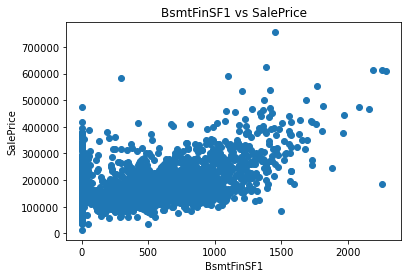

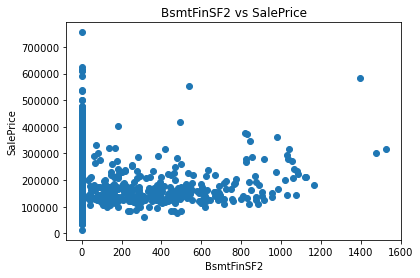

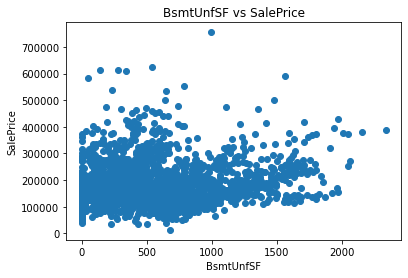

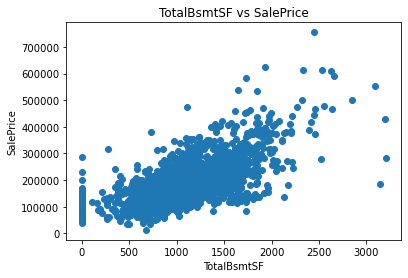

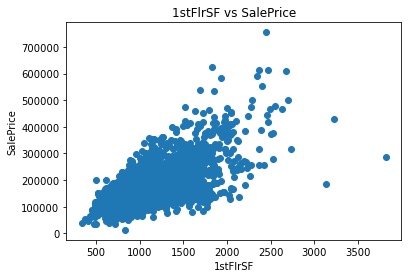

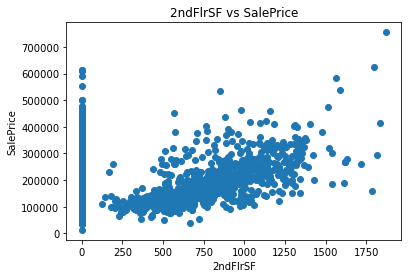

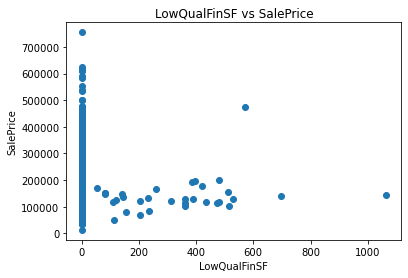

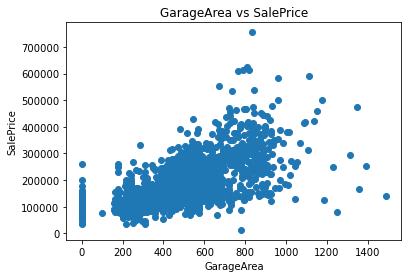

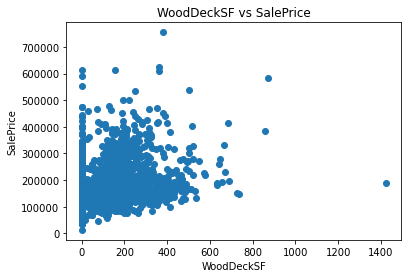

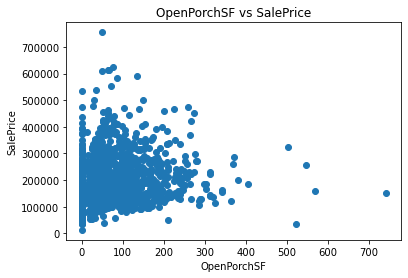

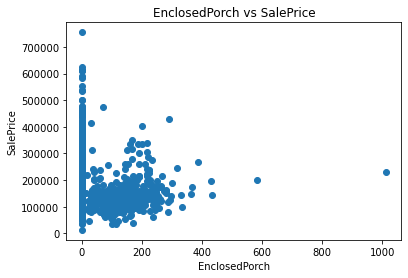

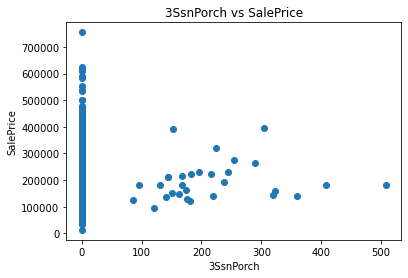

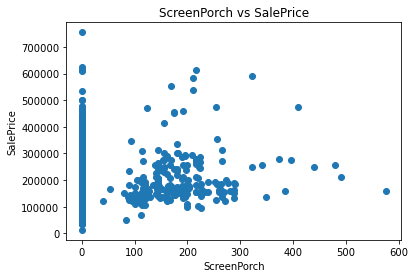

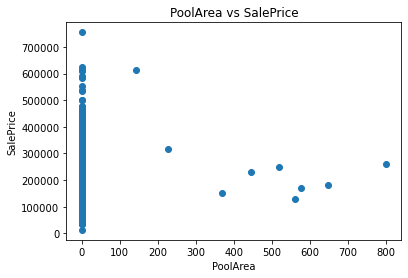

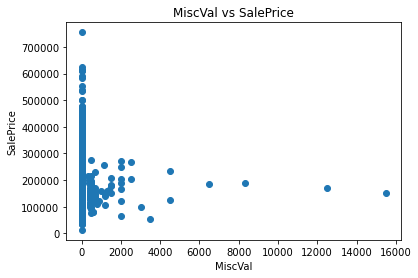

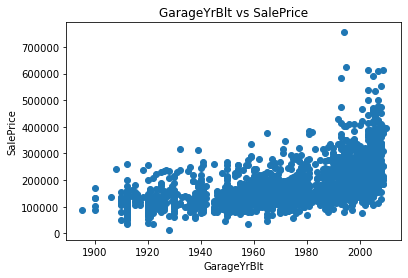

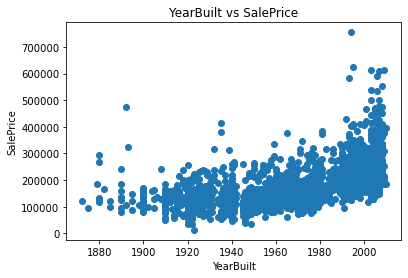

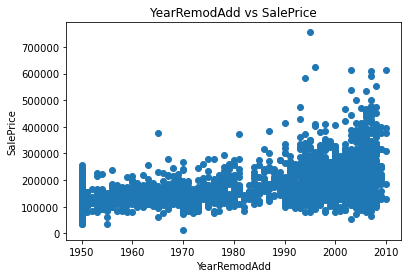

In [19]:
x_columns= h2.columns
y_col= 'SalePrice'

for x_col in x_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(housing[x_col], housing[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    plt.show()
    

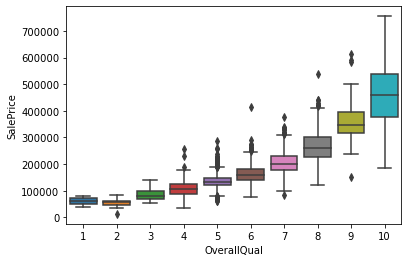

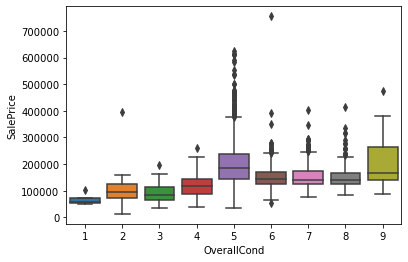

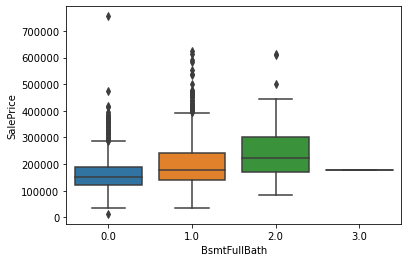

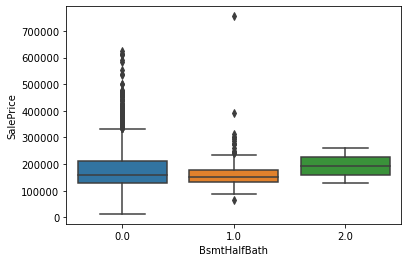

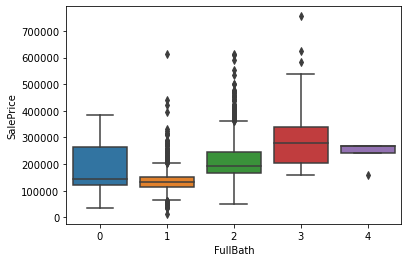

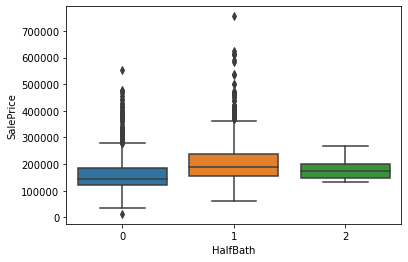

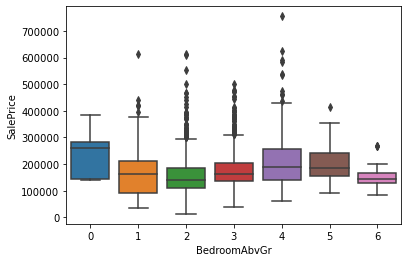

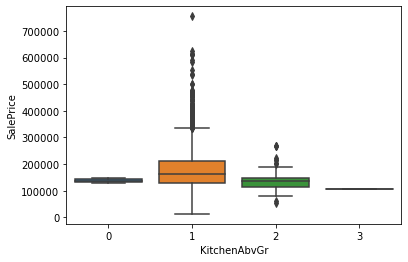

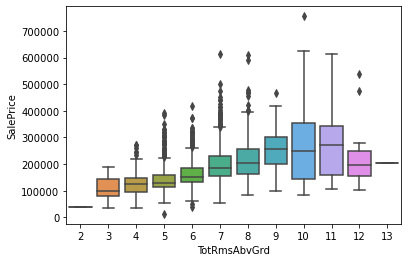

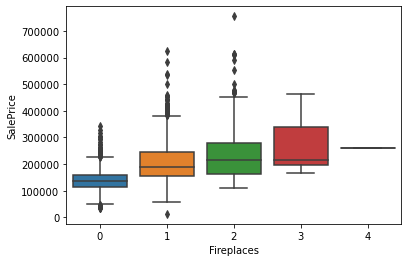

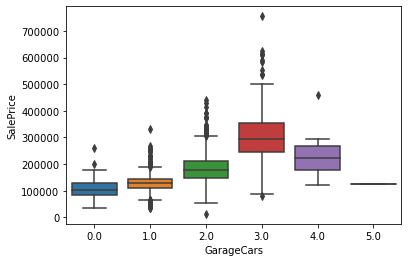

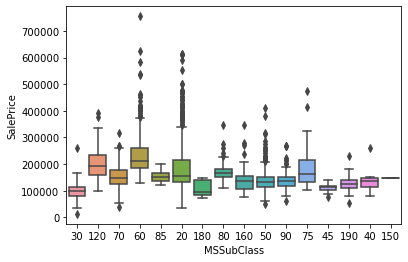

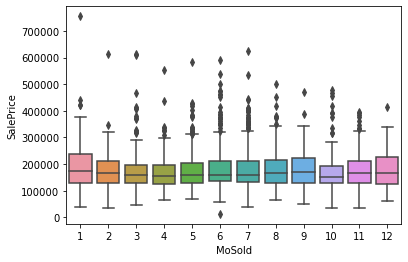

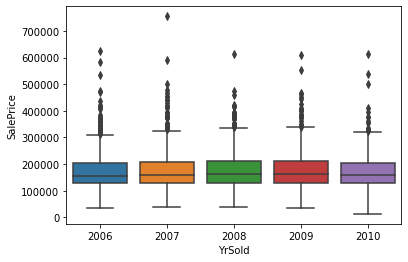

In [20]:
x_columns= h3.columns
y_col= 'SalePrice'

for x_col in x_columns:
    data = pd.concat([housing['SalePrice'], housing[x_col]], axis=1)
    ax = sns.boxplot(x=x_col, y=y_col, data=data)   
    plt.show()